# CLASIFICACIÓN SOBRE UN CLUSTERING PREVIO

In [1]:
using MLDatasets, MLDataUtils
using Clustering:kmeans
using StatsBase, Statistics, Distances
using Flux:onehot, onecold

### Carga del Ejemplo de IRIS

In [2]:
X = Iris.features()
y = Iris.labels();
size(X), size(y)

((4, 150), (150,))

### Estandarización de cada atributo de entrada: media cero y desviación estandar uno

In [3]:
X_norm = standardize(ZScoreTransform, X, dims=2)

4×150 Array{Float64,2}:
 -0.897674  -1.1392   -1.38073  -1.50149  …   0.793012  0.430722   0.0684325
  1.02861   -0.12454   0.33672   0.10609     -0.12454   0.797981  -0.12454
 -1.33679   -1.33679  -1.39347  -1.28012      0.816888  0.930239   0.760212
 -1.30859   -1.30859  -1.30859  -1.30859      1.05002   1.44312    0.787951

### Método del resorte estratificado: 2/3 y 1/3

In [4]:
(x_train, y_train), (x_test, y_test) = stratifiedobs((X_norm, y), p=2/3);

### Algoritmo de K-medias con 6 clusters

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       9.025782e+01
      1       5.572921e+01      -3.452861e+01 |        3
      2       4.966261e+01      -6.066606e+00 |        2
      3       4.776675e+01      -1.895854e+00 |        2
      4       4.704787e+01      -7.188849e-01 |        2
      5       4.678178e+01      -2.660857e-01 |        2
      6       4.660941e+01      -1.723676e-01 |        2
      7       4.634716e+01      -2.622541e-01 |        2
      8       4.631565e+01      -3.150975e-02 |        0
      9       4.631565e+01       0.000000e+00 |        0
K-means converged with 9 iterations (objv = 46.3156490355709)


### La salida de cada cluster se calcula como la moda de las muestras de aprendizaje pertenecientes a él

6-element Array{Any,1}:
 "Iris-setosa"
 "Iris-virginica"
 "Iris-versicolor"
 "Iris-versicolor"
 "Iris-virginica"
 "Iris-setosa"

In [7]:
y_predict_test = onecold(pairwise(Euclidean(), x_test, kmedias.centers, dims=2)'.^(-1), moda);

In [8]:
accuracy = sum(y_predict_test .== y_test)/size(y_test)[1]

0.9019607843137255

In [9]:
using MLBase

# Validación Cruzada CV=10

### K = 6

In [10]:

for train_index in StratifiedKfold(y, 10)

    
end
println("Aciertos =", aciertos/10)

Aciertos =0.8466666666666667


# Cálculo de K óptimo

In [11]:
using DataFrames

### Se varía K entre 3 y 20

In [26]:
min_clusters=3
max_clusters=20
df = DataFrame(zeros(10, max_clusters-min_clusters+1), [Symbol(x) for x in min_clusters:max_clusters])
for n in min_clusters:max_clusters

end

In [28]:
ENV["COLUMNS"]=200
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.8,0.8,0.733333,0.8,0.933333,1.0,0.8,1.0,0.866667,0.933333,0.866667,1.0,0.933333,0.8,1.0,0.8,0.933333,0.933333
2,0.666667,0.8,0.866667,0.933333,0.8,0.733333,0.866667,0.933333,0.866667,1.0,0.866667,0.866667,1.0,1.0,0.866667,1.0,0.933333,0.933333
3,0.733333,0.866667,0.866667,0.8,0.866667,0.866667,1.0,0.866667,1.0,0.866667,0.933333,0.933333,0.866667,0.866667,0.8,0.933333,0.933333,0.8
4,0.8,0.866667,0.8,0.866667,0.933333,0.866667,0.866667,0.933333,0.8,0.933333,0.933333,1.0,1.0,0.933333,1.0,0.933333,0.933333,1.0
5,0.666667,0.933333,0.866667,0.933333,0.8,0.8,0.933333,1.0,0.733333,0.8,0.933333,0.866667,0.933333,0.866667,0.866667,1.0,1.0,0.866667
6,0.8,0.8,0.733333,0.866667,0.8,0.933333,0.8,0.733333,0.933333,0.8,0.866667,0.866667,1.0,0.933333,1.0,1.0,0.866667,1.0
7,0.8,0.866667,0.866667,0.933333,1.0,1.0,0.933333,0.933333,1.0,0.933333,0.933333,0.866667,1.0,0.933333,1.0,0.933333,0.933333,1.0
8,0.866667,0.866667,0.666667,0.733333,0.933333,0.866667,0.933333,0.8,0.866667,1.0,1.0,0.933333,1.0,0.933333,0.866667,1.0,1.0,0.933333
9,0.866667,0.866667,0.866667,1.0,0.933333,0.933333,1.0,0.866667,0.866667,1.0,0.866667,1.0,0.933333,0.933333,1.0,0.933333,0.866667,0.933333


In [29]:
using Plots

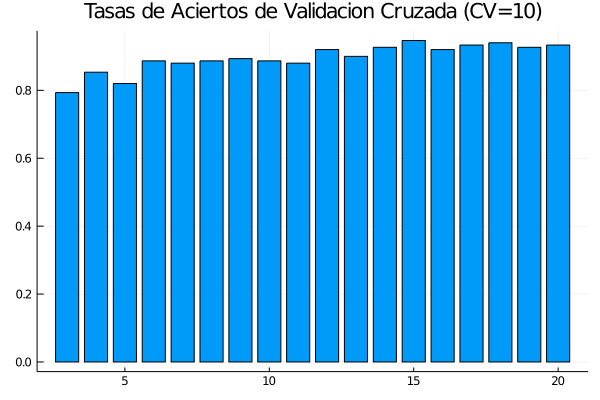

In [30]:
img=bar(collect(min_clusters:max_clusters), describe(df).mean, label="", xlims=[min_clusters-0.5,max_clusters+0.5])
title!(img, "Tasas de Aciertos de Validacion Cruzada (CV=10)")

In [34]:
println("K óptimo = ", argmax([mean(df[:,Symbol(x)]) for x in min_clusters:max_clusters])+min_clusters-1)

K óptimo = 15
